# Linear Regression Assignment

##  Importing Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

##  Understanding and Cleaning Data

In [2]:
bike_sh_df = pd.read_csv("~/Desktop/Desktop/personal/AI/Bike_sharing/day.csv")

In [3]:
bike_sh_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sh_df.shape

(730, 16)

In [5]:
bike_sh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sh_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike_sh_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bike_sh_df.size

11680

In [9]:
bike_sh_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
bike_sh_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [11]:
bike_sh_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

there are 730 rows and 16 columns in the data set. there are no null values in any of the columns

## Cleaning Data

In [13]:
#Removing the columns not useful

In [14]:
bike_sh_df['days_old'] = (pd.to_datetime(bike_sh_df['dteday'],format = '%d-%m-%Y')-pd.to_datetime('01-01-2018', format= '%d-%m-%Y')).dt.days

In [15]:
bike_sh_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [16]:
bike_sh_df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [17]:
bike_sh_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [18]:
bike_sh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [19]:
bike_sh_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [20]:
bike_sh_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
bike_sh_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


### Handling Outliers

In [22]:
bike_sh_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [23]:
bike_sh_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

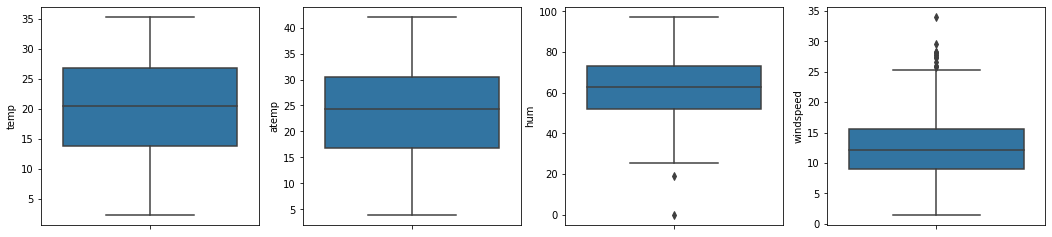

In [24]:
#Draw box plot for independent variables with continous variable
cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize= (18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y = col,data = bike_sh_df)
    i+=1

# EDA

In [25]:
#convert season and weathersit to categorical types

In [26]:
bike_sh_df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bike_sh_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)
bike_sh_df.mnth = bike_sh_df.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',
                                7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})
bike_sh_df.weekday = bike_sh_df.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sh_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


# Draw pair plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

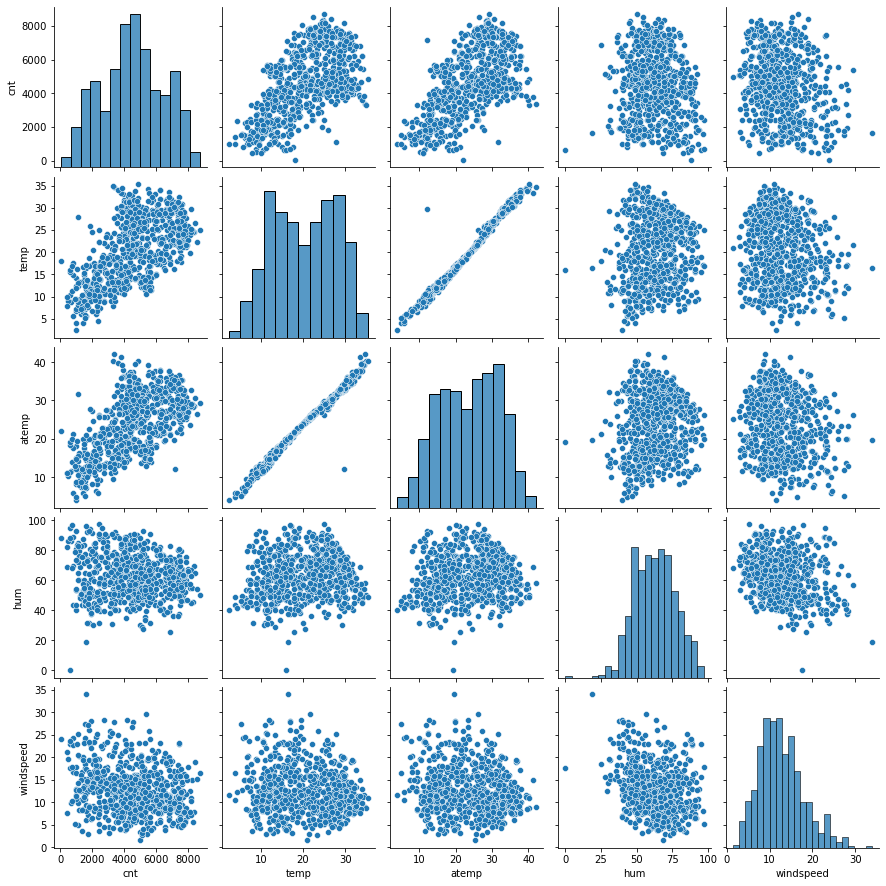

In [27]:
#Draw pairplots for continous numeric variables using seaborn
plt.figure(figsize=(15,30))
sns.pairplot(data = bike_sh_df,vars =['cnt','temp','atemp','hum','windspeed'])
plt.show()

<Figure size 1440x1080 with 0 Axes>

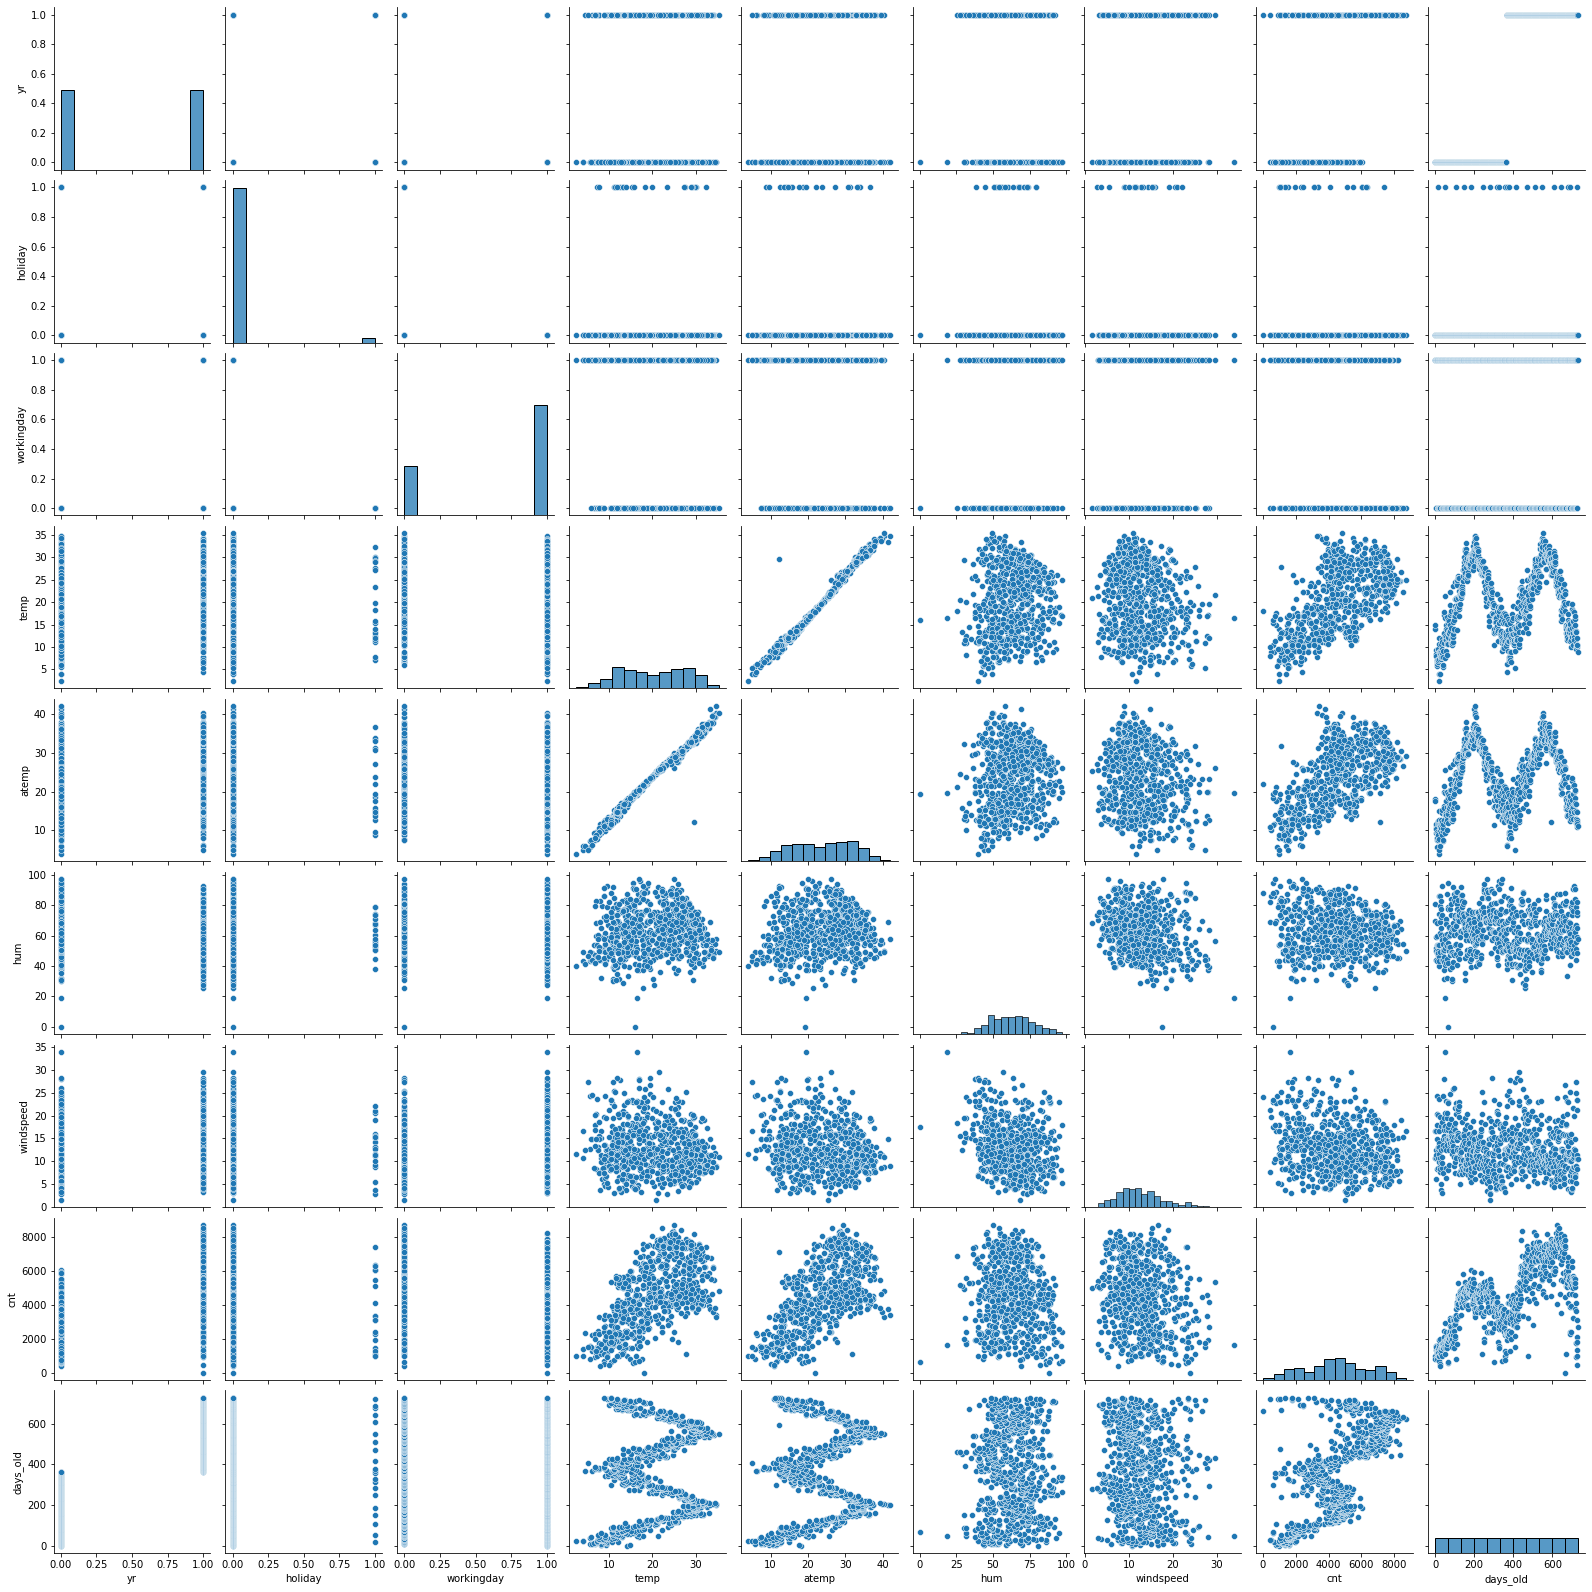

In [28]:
##visualising the data to find the co relation between the numeric variable
plt.figure(figsize = (20,15))
sns.pairplot(bike_sh_df)
plt.show()

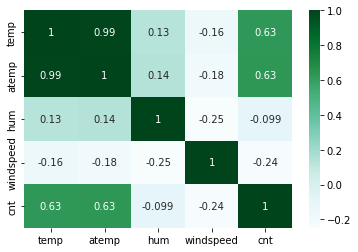

In [29]:
#checking continous variables relationship with each other
sns.heatmap(bike_sh_df[['temp','atemp','hum','windspeed','cnt']].corr(),cmap ='BuGn',annot = True)
plt.show()

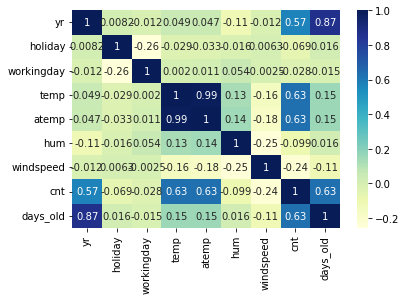

In [30]:
#corelations for numeric variables
cor = bike_sh_df.corr()
sns.heatmap(cor,cmap="YlGnBu",annot = True)
plt.show()

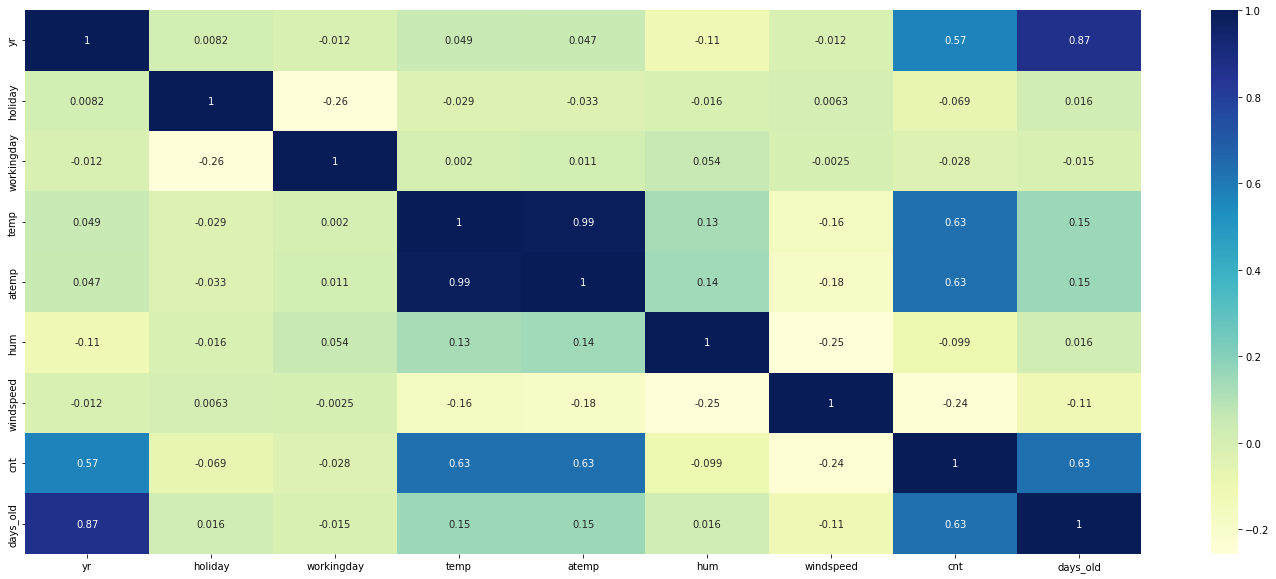

In [31]:
#calculate correlation
corr = bike_sh_df.corr()
plt.figure(figsize=(25,10))

#Draw heatmap of correlation
sns.heatmap(corr,annot =True,cmap ='YlGnBu')
plt.show()

In [32]:
#Analysing Categorical Varibales with target variables

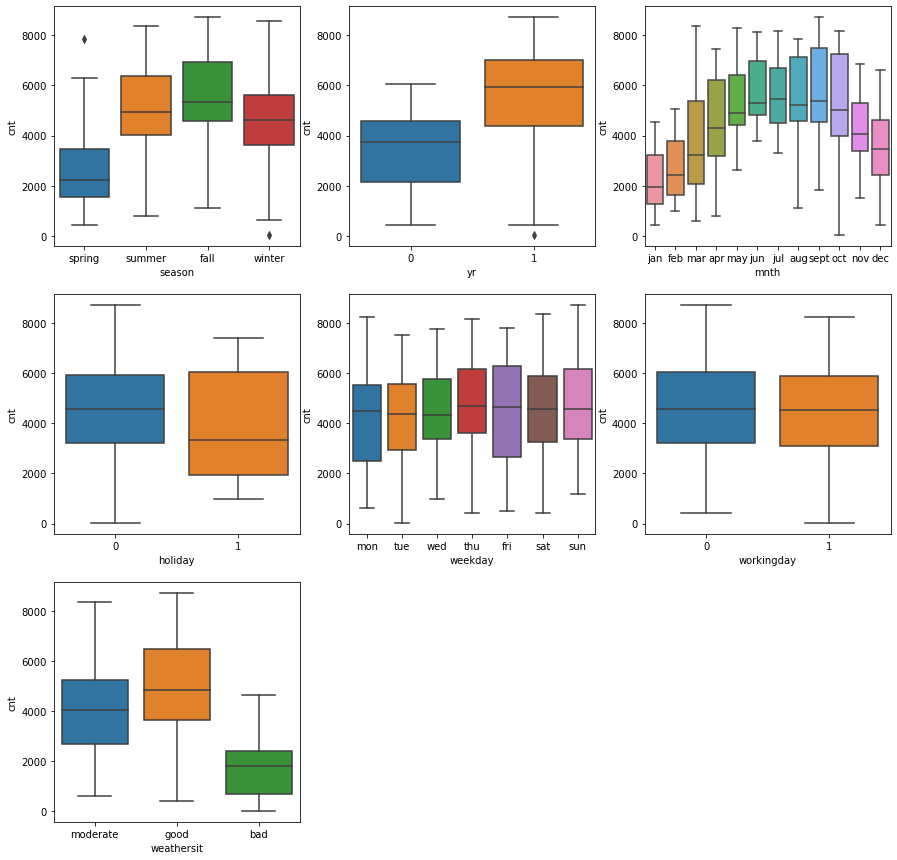

In [33]:
#boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize = (15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data = bike_sh_df,x=i[1],y='cnt')
plt.show()

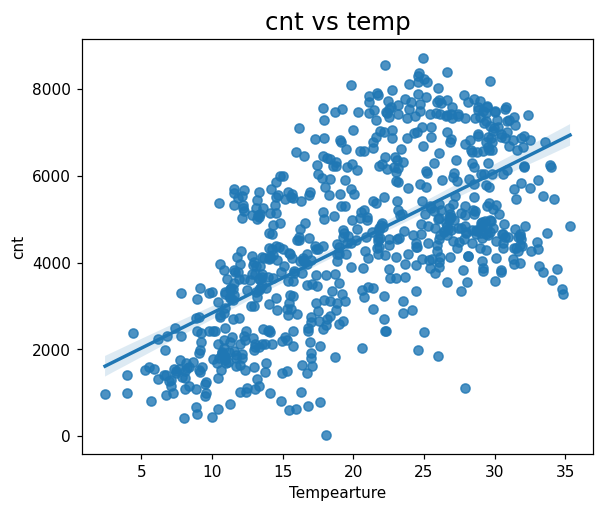

In [34]:
plt.figure(figsize=(6,5),dpi=110)
plt.title('cnt vs temp',fontsize = 16)
sns.regplot(data = bike_sh_df,y = 'cnt', x='temp')
plt.xlabel('Tempearture')
plt.show()

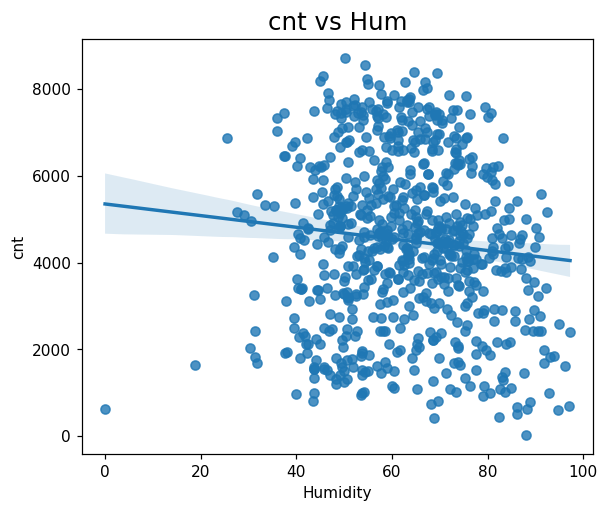

In [35]:
plt.figure(figsize = (6,5),dpi = 110)
plt.title('cnt vs Hum',fontsize = 16)
sns.regplot(data = bike_sh_df, y = 'cnt', x ='hum')
plt.xlabel('Humidity')
plt.show()

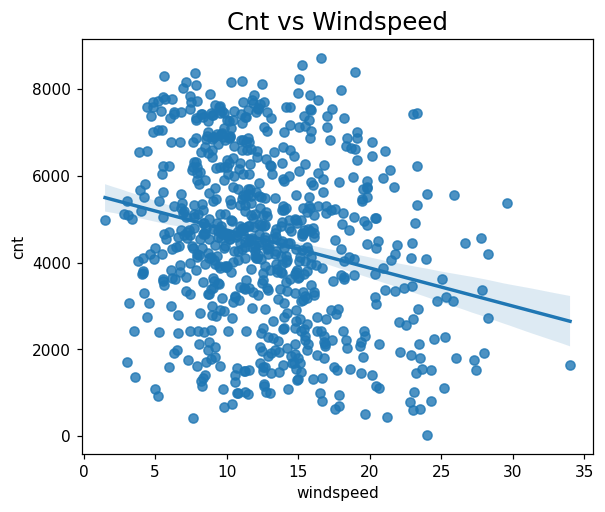

In [36]:
plt.figure(figsize =(6,5),dpi = 110)
plt.title('Cnt vs Windspeed',fontsize = 16)
sns.regplot(data = bike_sh_df, y ='cnt', x = 'windspeed')
plt.show()

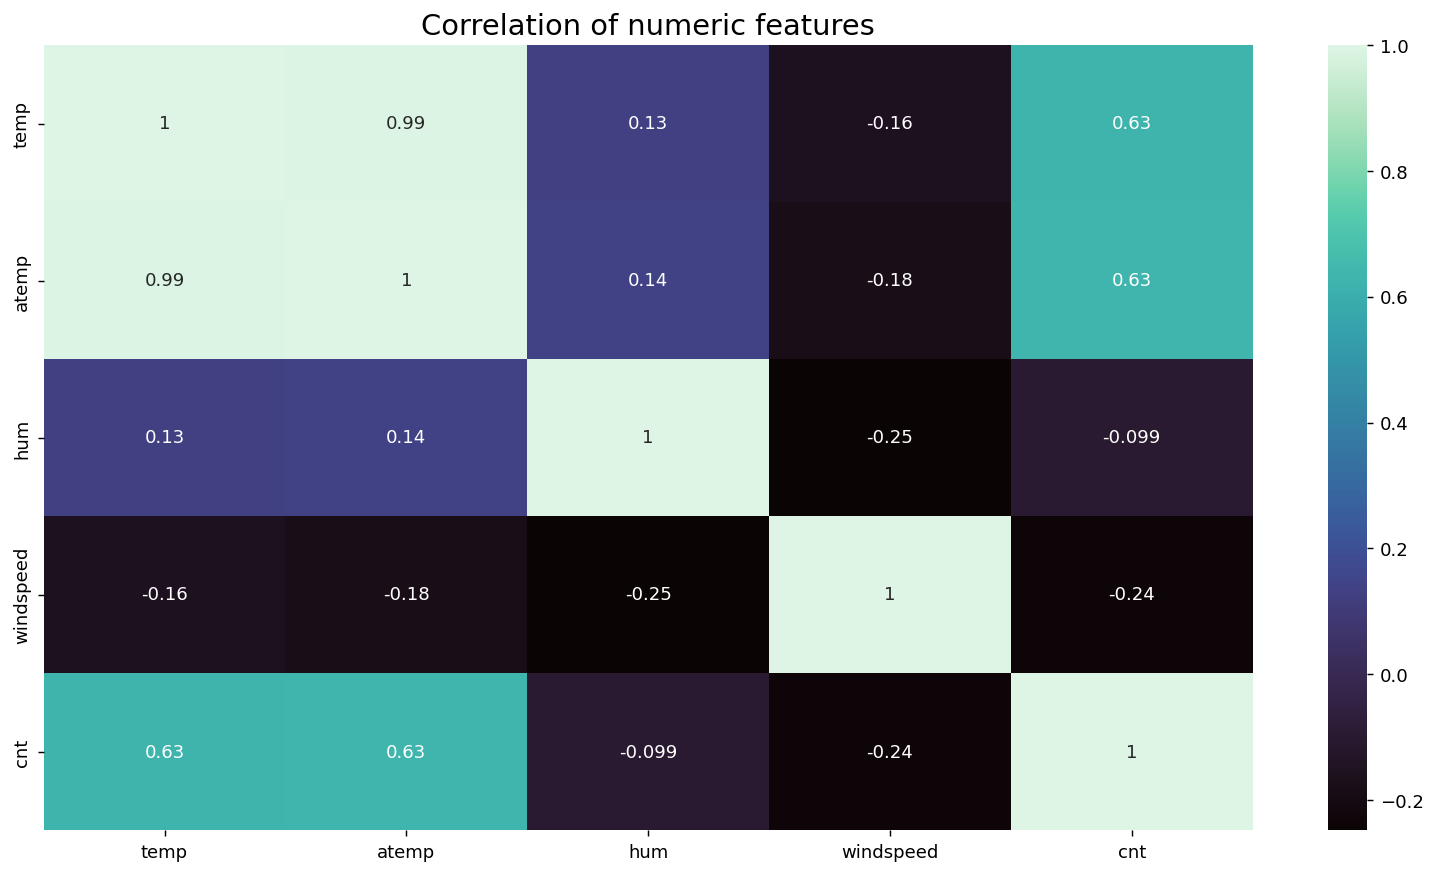

In [37]:
num_features = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize =(15,8),dpi =130)
plt.title('Correlation of numeric features',fontsize= 16)
sns.heatmap(bike_sh_df[num_features].corr(),annot = True,cmap ='mako')
plt.show()

In [38]:
bike_sh_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


### Data Preparation for Linear Regression

Create dummy variables for all categorical variables

In [39]:
bike_sh_df = pd.get_dummies(data = bike_sh_df,columns = ['season','mnth','weekday'],drop_first = True)
bike_sh_df = pd.get_dummies(data = bike_sh_df,columns = ['weathersit'])

In [40]:
#print columns after creating dummies
bike_sh_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [41]:
#print few rows to inspect
bike_sh_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# Model Building

In [42]:
#Split Data into training and test
bike_sh_df.shape

(730, 32)

In [43]:
# divide the training and test data in 70:30 ratio
y = bike_sh_df.pop('cnt')

x = bike_sh_df

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [44]:
#Inspect independent variables
x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
print(x_train.shape)
print(x_train.shape)

(511, 31)
(511, 31)


### Feature Scaling continous Variables

In [46]:
#Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [47]:
num_vars = ['temp','atemp','hum','windspeed','days_old']
scaler = MinMaxScaler() 
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [48]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


MODEL 1 :  RFE approach:

In [50]:
#Build a linear regression model sklearn for RFE
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
#cut down number of features to 15 
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(x_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [52]:
#columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### Manual elimination


In [53]:
#function to build a model using statsmodel api - takes the columns to be selected for model as a parameter
   
def build_models(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train , x_train_sm).fit()
    print(lm.summary())
    return lm

In [54]:
#function to calculate VIFs and print them - takes the columns for which VIF to be calculated as a parameter

def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF',ascending = False))

In [55]:
#print columns selected by RFE. We will start with these columns for manual elimination
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [56]:
#features not selected by RFE
x_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [57]:
#Taking 15 columns supported by RFE for regression
x_train_rfe = x_train[['yr','holiday','workingday','temp','hum','windspeed','season_spring',
                      'season_summer','season_winter','mnth_jan','mnth_jul','mnth_sept','weekday_sat',
                      'weathersit_bad','weathersit_moderate']]

In [58]:
x_train_rfe.shape

(511, 15)

### Model 1 - start with all variables selected by RFE

In [59]:
#selected columns for model 1 - all columns selected by RFE
cols = ['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer','season_winter','mnth_jan','mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.70e-181
Time:                        21:18:56   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

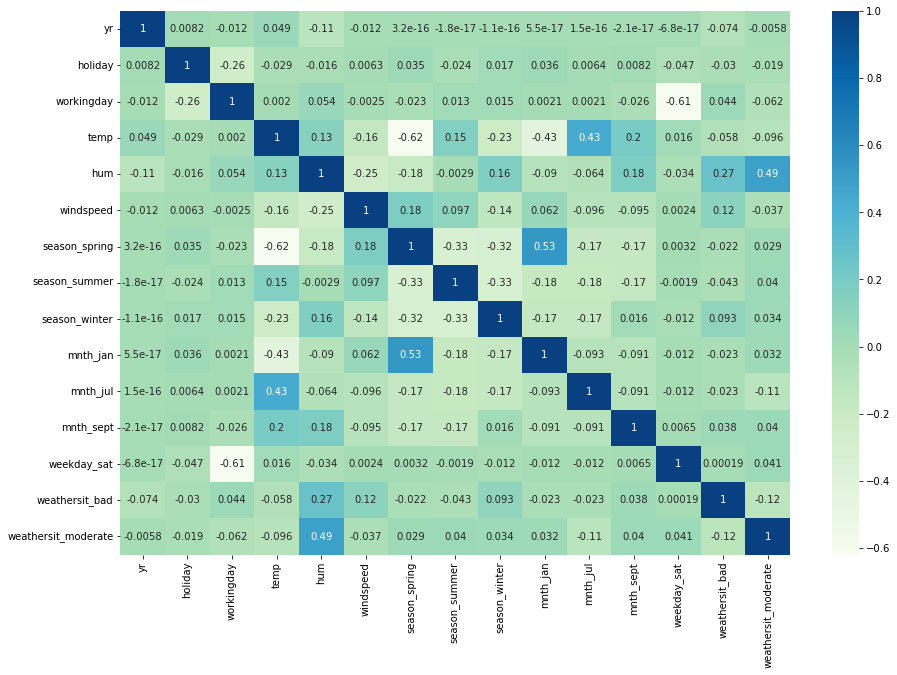

In [60]:
#checking correlation of features selected by RFE with target column.
#Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bike_sh_df[['yr','holiday','workingday','temp','hum','windspeed','season_spring','season_summer',
                  'season_winter','mnth_jan','mnth_jul','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']].corr(),cmap ='GnBu',annot = True)
plt.show()

### Model 2 

In [61]:
#Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p- value
cols = ['yr','holiday','workingday','temp','hum','windspeed','season_spring',
       'season_summer','season_winter','mnth_jul','mnth_sept','weekday_sat',
       'weathersit_bad','weathersit_moderate']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.35e-182
Time:                        21:18:57   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

### Model 3

all the columns have p- value > .05 so checking VIFs

In [62]:
#dropping the variable hum as it has negative coefficient and as is insignificant as it has high p-value 
cols =['yr','holiday','workingday','temp','windspeed','season_spring',
      'season_summer','season_winter','mnth_jul','mnth_sept','weekday_sat',
      'weathersit_bad','weathersit_moderate']
build_models(cols)
get_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.37e-180
Time:                        21:18:57   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

### Model 4

In [63]:
cols = ['yr','workingday','temp','windspeed','season_spring',
       'season_summer','season_winter','mnth_jul','mnth_sept','weekday_sat',
        'weathersit_bad','weathersit_moderate']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.51e-178
Time:                        21:18:57   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

### Model 5

In [64]:
#Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value 
cols = ['yr','workingday','temp','windspeed','season_spring','season_summer',
       'season_winter','mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          8.20e-179
Time:                        21:18:57   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

### Model 6

In [65]:
#Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value 
cols = ['yr','workingday','windspeed','season_spring','season_summer','season_winter','mnth_sept',
       'weekday_sat','weathersit_bad','weathersit_moderate']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          4.14e-147
Time:                        21:18:57   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

### Model 7

In [66]:
# Trying to replace july with spring as both were highly correlated
cols = ['yr','workingday','windspeed','mnth_jul','season_summer','season_winter',
       'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Tue, 12 Jul 2022   Prob (F-statistic):           1.84e-92
Time:                        21:18:57   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

### Model 8

In [67]:
#Remove windspeed with spring as windspeed was highly correlated with temp
cols = ['yr','workingday','season_spring','mnth_jul','season_summer','season_winter',
       'mnth_sept','weekday_sat','weathersit_bad','weathersit_moderate']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          1.75e-142
Time:                        21:18:57   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

### Model 9

In [68]:
#using the weekend 'sunday' which was dropped during RFE instead of saturday.
cols = ['yr','workingday','season_spring','mnth_jul','season_summer',
       'season_winter','mnth_sept','weekday_sun','weathersit_bad','weathersit_moderate']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          3.20e-142
Time:                        21:18:57   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

### Model 10

In [69]:
#adding temp and removed 'season_summer' and 'workingday'
cols = ['yr','season_spring','mnth_jul','season_winter','mnth_sept','weekday_sun',
       'weathersit_bad','weathersit_moderate','temp']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          9.73e-178
Time:                        21:18:57   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

Inference:- Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821 let us select model 11 as our final it has all important statistics high (R-square,Adjusted R-squared and F-statistic),along with no insignificant variables and no multi colinear(high VIf) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that are no additional parametrs that can be removed from this model.

In [70]:
#build a model with all columns to select features automatically
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [71]:
#let us build the final model using sklearn
lr = build_model_sk(x_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164272 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


#  Model Evalutaion
##  Residucal Analysis

In [72]:
y_train_pred = lr.predict(x_train[cols])

In [73]:
#plot a histogram of the error terms
def plot_res_dist(act,pred):
    sns.displot(act-pred)
    plt.title('Errors Terms')
    plt.xlabel('Errors')

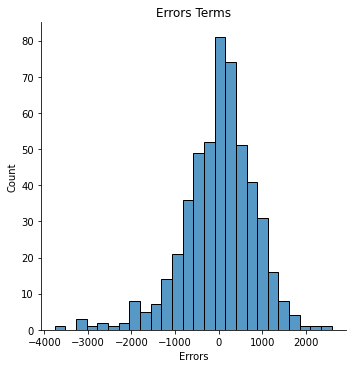

In [74]:
plot_res_dist(y_train,y_train_pred)

Errors are normally distributed here with mean 0. So everything seems to be fine

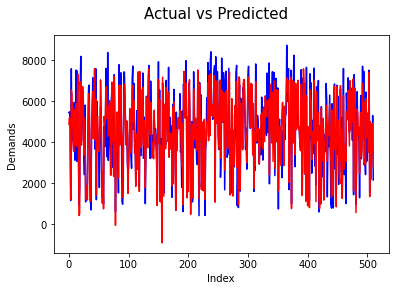

In [75]:
#Actual vs predicted 
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train,color = 'blue')
plt.plot(c,y_train_pred, color = 'red')
plt.suptitle('Actual vs Predicted',fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and predicted result following almost the same pattern so this model seems ok

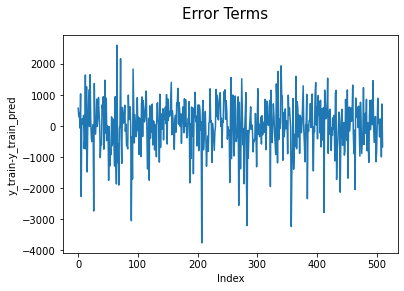

In [76]:
#error terms 
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here, if we see the error terms are independent of each other.



In [77]:
#print R-squared
r2_score(y_train,y_train_pred)

0.8158045196281631

Inference:
    R2 same as we obtained for our final model

## Linearity Check

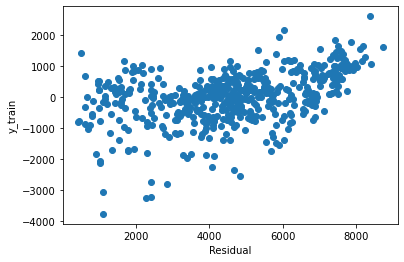

In [78]:
#scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

## Predict values for test data set

In [79]:
#scale variables in x_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#test data to be transformed only, no fitting
x_test[num_vars] = scaler.transform(x_test[num_vars])

In [80]:
#columns from our final model
cols =  ['yr','season_spring','mnth_jul','season_winter','mnth_sept','weekday_sun',
        'weathersit_bad','weathersit_moderate','temp']

#predict the values for test data
y_test_pred = lr.predict(x_test[cols])

##  R-squared value for test predictions

In [81]:
#find out the R squared value between test and predicted test data sets.
r2_score(y_test,y_test_pred)

0.8127228702995222

## Homoscedacity

Text(0, 0.5, 'y_test')

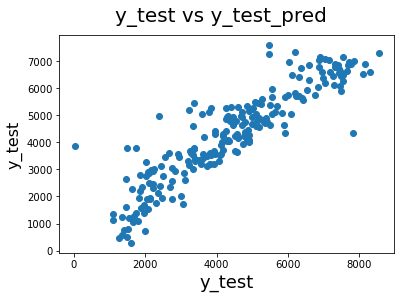

In [82]:
#plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_test',fontsize = 16)

## plot test vs predicted test values

In [83]:
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize =(14,5))
    plt.plot(c,act,color ='blue', linewidth = 2.5, linestyle = '-')
    plt.plot(c,pred,color = 'red',linewidth = 2.5, linestyle = '-')
    fig.suptitle('Actual and Predicted - '+dataname,fontsize = 20)
    plt.xlabel('Index',fontsize = 18)
    plt.ylabel('Counts',fontsize = 16)

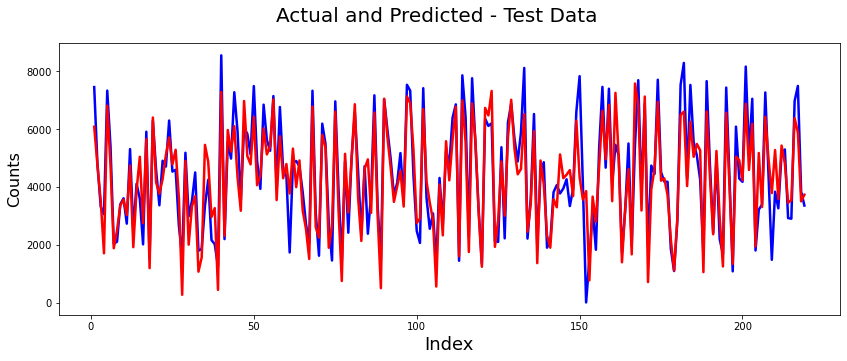

In [84]:
#plot Actual vs Predicted for test data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

##  plot error terms for test data

In [85]:
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize = (14,5))
    plt.plot(c,act-pred,color='blue',marker = 'o', linewidth = 2.5, linestyle ='')
    fig.suptitle('Error Terms', fontsize = 20)
    plt.xlabel('Index', fontsize = 18)
    plt.ylabel('Count - Predicted counts', fontsize= 16)
    

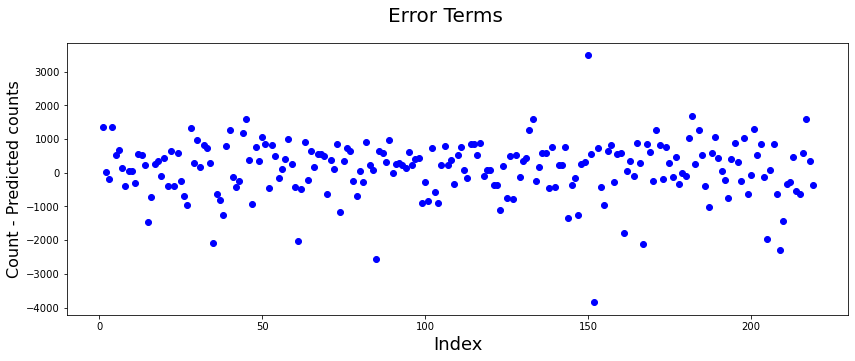

In [86]:
plot_err_terms(y_test,y_test_pred)

# Making Predictions

In [87]:
bike_sh_df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


###  Intrepretting the model

In [88]:
#let us rebuild the final model of manual + rfe approach using statsmodel to interpret it 
cols = ['yr','season_spring','mnth_jul','season_winter','mnth_sept','weekday_sun',
       'weathersit_bad','weathersit_moderate','temp']

lm = build_models(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):          9.73e-178
Time:                        21:18:58   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    